In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [13]:
# 1. 데이터 불러오기
df = pd.read_excel('./data/생산성.xlsx', dtype={'거래소코드' : str})
df

,회사명,거래소코드,회계년도,부가가치(IFRS)(백만원),종업원1인당 부가가치(IFRS)(백만원),종업원1인당 매출액(IFRS)(백만원),종업원1인당 정상영업이익(IFRS)(백만원),종업원1인당 순이익(IFRS)(백만원),종업원1인당 인건비(IFRS)(백만원),자본집약도(IFRS),총자본투자효율(IFRS),부가가치율(IFRS),노동소득분배율(IFRS),자본분배율(IFRS)
0,(주)BNK금융지주,138930,2015/12,16811.40,16811.40,818.49,130.13,79.64,119.92,65554.50,0.32,25.67,57.07,42.93
1,(주)BNK금융지주,138930,2016/12,88426.60,88426.60,1418.12,846.37,826.29,123.60,0.00,1.52,67.78,12.86,87.14
2,(주)BNK금융지주,138930,2017/12,145544.64,145544.64,1428.66,1032.68,1009.25,101.67,45140.99,2.48,78.37,9.08,90.92
3,(주)BNK금융지주,138930,2018/12,55406.86,55406.86,634.13,206.31,180.58,149.53,0.00,0.91,54.27,43.45,56.55
4,(주)BNK금융지주,138930,2019/12,116340.10,116340.10,1670.60,962.41,953.91,228.12,0.00,1.90,72.54,18.82,81.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,효성티앤씨(주),298020,2020/12,227963.96,149.19,2057.12,54.52,40.81,76.89,808.38,18.46,7.25,51.54,48.46
2774,효성티앤씨(주),298020,2021/12,506944.21,337.74,3038.51,215.93,183.87,88.34,0.00,31.41,11.12,26.16,73.84
2775,효성티앤씨(주),298020,2022/12,290660.95,202.55,3738.33,124.62,201.89,88.33,0.00,17.33,5.42,43.61,56.39
2776,효성티앤씨(주),298020,2023/12,244962.76,176.36,3205.94,78.15,69.08,86.51,0.00,15.17,5.50,49.06,50.94


In [14]:
df = df.iloc[:,3:].dropna()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 0 to 2777
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   부가가치(IFRS)(백만원)           2760 non-null   float64
 1   종업원1인당 부가가치(IFRS)(백만원)    2760 non-null   float64
 2   종업원1인당 매출액(IFRS)(백만원)     2760 non-null   float64
 3   종업원1인당 정상영업이익(IFRS)(백만원)  2760 non-null   float64
 4   종업원1인당 순이익(IFRS)(백만원)     2760 non-null   float64
 5   종업원1인당 인건비(IFRS)(백만원)     2760 non-null   float64
 6   자본집약도(IFRS)               2760 non-null   float64
 7   총자본투자효율(IFRS)             2760 non-null   float64
 8   부가가치율(IFRS)               2760 non-null   float64
 9   노동소득분배율(IFRS)             2760 non-null   float64
 10  자본분배율(IFRS)               2760 non-null   float64
dtypes: float64(11)
memory usage: 258.8 KB


In [45]:
# 2. 수치형 변수만 선택 (요인분석은 수치형 변수만 가능)
numeric_cols = df.select_dtypes(include=[np.number]).columns
X = df[numeric_cols].dropna()
X = (X-np.mean(X,axis=0))/(np.std(X,axis=0))
# 3. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 요인분석 (예: 3개 요인)
fa = FactorAnalysis(n_components=3, rotation='varimax')
X_factors = fa.fit_transform(X_scaled)

In [46]:
factor_names = [f'Factor_{1+i}' for i in range(X_factors.shape[1])]
X_factors_df = pd.DataFrame(fa.components_.T, index = X.columns, columns=factor_names)

In [47]:
X_factors_df

,Factor_1,Factor_2,Factor_3
부가가치(IFRS)(백만원),-0.021317,0.012714,0.013986
종업원1인당 부가가치(IFRS)(백만원),-0.015509,0.006066,0.315072
종업원1인당 매출액(IFRS)(백만원),-0.037638,-0.016159,0.851710
종업원1인당 정상영업이익(IFRS)(백만원),-0.020331,0.170036,0.795943
종업원1인당 순이익(IFRS)(백만원),-0.002935,0.517154,0.300046
종업원1인당 인건비(IFRS)(백만원),-0.014447,0.261185,0.624073
자본집약도(IFRS),-0.013225,0.089183,0.242305
총자본투자효율(IFRS),-0.070196,0.149222,-0.219893
부가가치율(IFRS),-0.031036,0.938659,0.075194
노동소득분배율(IFRS),0.998977,-0.007130,-0.019313


[0.99923843 0.89199776 0.84457814]


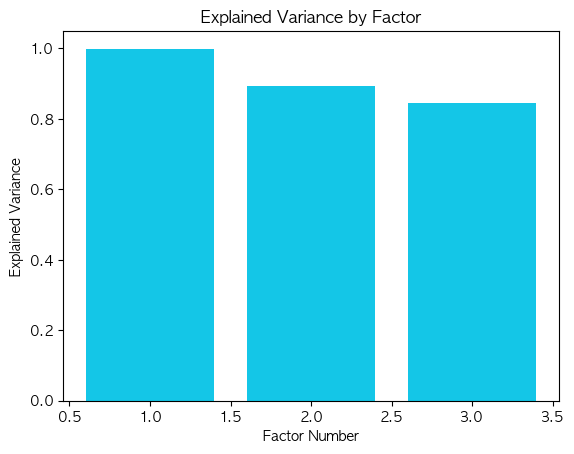

In [48]:
# 5. 설명된 분산 계산 (근사치)
explained_variance = np.var(X_factors, axis=0)
print(explained_variance)
# 6. 결과 시각화
plt.bar(range(1, 4), explained_variance, color="#14c6e7")
plt.xlabel('Factor Number')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Factor')
plt.show()